## ERPData Exploration

This notebook imports the ERP data from ERPdata.csv, which contains average ERPs from 9 electrodes for each subject.

In [11]:
# path to all local data files
DATA_PATH = '../data/'

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

from mvlearn.decomposition import MultiviewICA

### Load data

In [13]:
erp_data = pd.read_csv(DATA_PATH + 'ERPdata.csv')
erp_time_data = pd.read_csv(DATA_PATH + 'datasets_4369_271524_time.csv')
demographic_data = pd.read_csv(DATA_PATH + 'datasets_4369_271524_demographic.csv')

In [14]:
print(erp_data.shape)
erp_data.head()

(746496, 12)


,subject,condition,Fz,FCz,Cz,FC3,FC4,C3,C4,CP3,CP4,time_ms
0,1,1,5.533701,5.726507,5.469535,5.386723,4.588875,6.560092,4.542811,5.397492,5.103695,-1500.0000
1,1,1,5.651489,5.837326,5.773131,5.627975,4.822217,6.739976,4.811770,5.541357,5.379273,-1499.0234
2,1,1,5.717580,5.932924,5.948466,5.826460,4.979647,7.026199,5.053779,5.634972,5.600504,-1498.0469
3,1,1,5.703267,5.968103,5.851512,5.812192,4.992899,6.940671,5.106650,5.543577,5.589775,-1497.0703
4,1,1,5.571578,5.917541,5.812808,5.744715,4.963338,6.726491,5.158073,5.454069,5.614092,-1496.0938


In [15]:
# length of each recording for a single condition
RECORD_LEN = erp_data.groupby(['subject', 'condition']).count().iloc[0, 1]
print(RECORD_LEN)
N_SUBJECTS = 81

3072


In [16]:
ALL_CHANNELS = ['Fz', 'FCz', 'Cz', 'FC3', 'FC4', 'C3', 'C4', 'CP3', 'CP4']

In [17]:
erp_data.set_index(['subject', 'condition'], inplace=True)

Index(['subject', ' group', ' gender', ' age', ' education'], dtype='object')

In [27]:
# labels: 0 = control, 1 = Schizophrenia
demographic_data.groupby([' group']).count()

,subject,gender,age,education
group,,,,
0,32,32,32,32
1,49,49,49,49


### Plot one subject's time series for each condition

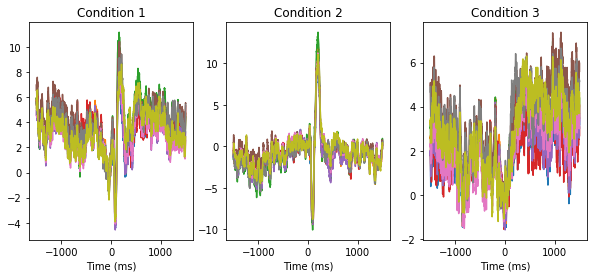

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(10,4))
for c, ax in enumerate(axs):
    ax.plot(erp_data['time_ms'].loc[(1, c+1)], erp_data[ALL_CHANNELS].loc[(1, c+1)])
    ax.set_title('Condition {}'.format(c+1))
    ax.set_xlabel('Time (ms)')

plt.show()

### Perform Multiview ICA

In [32]:
subject_ids = [i for i in range(1, N_SUBJECTS+1)]
condition_ids = [i for i in range(1, 4)]
temp = [list(zip(each_permutation, condition_ids)) for each_permutation in itertools.permutations(subject_ids, len(condition_ids))]
permutations = set([item for sublist in temp for item in sublist])
print(len(permutations))
permutations = sorted(permutations)

243


In [37]:
Xs = []
for perm in permutations:
    Xs.append(erp_data[ALL_CHANNELS].loc[(perm[0], perm[1])].values)


In [40]:

ica = MultiviewICA(random_state=42, n_jobs=None)
ica.fit(Xs)

/usr/local/lib/python3.7/site-packages/mvlearn/decomposition/mv_ica.py:620: UserWarning: Multiview ICA has not converged - gradient norm: 1.541034e-02 
  "Multiview ICA has not converged - gradient norm: %e " % g_norms


MultiviewICA(init='permica', max_iter=1000, n_components=None, n_jobs=None,
             noise=1.0, random_state=42, tol=0.001, verbose=False)

In [41]:
source = ica.source_

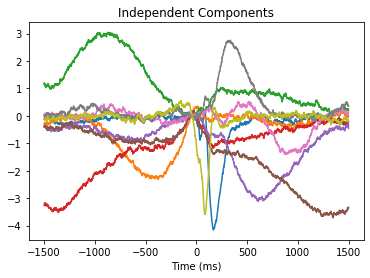

In [43]:
time_1record = erp_data['time_ms'][:RECORD_LEN]
plt.figure()
plt.plot(time_1record, source)
plt.xlabel('Time (ms)')
plt.title('Independent Components')
plt.show()

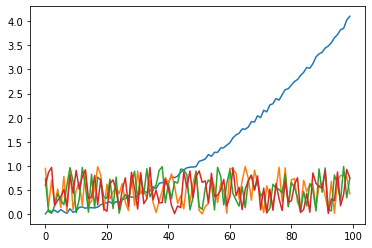

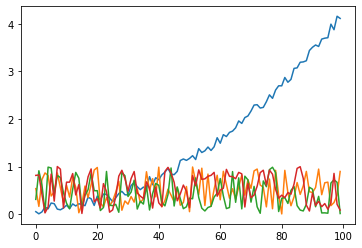

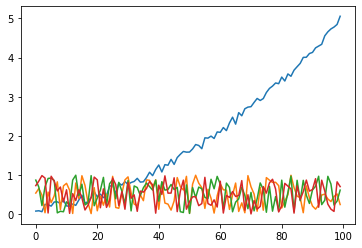

In [3]:
t = np.linspace(0, 2, 100)

np.random.seed(42)

rand_data1 = np.random.rand(100, 4)
rand_data1[:,0] = np.square(t) + 0.1*np.random.rand(100)
plt.figure()
plt.plot(rand_data1)
plt.show()

rand_data2 = np.random.rand(100, 4)
rand_data2[:,0] = np.square(t) + .25*np.random.rand(100)
plt.figure()
plt.plot(rand_data2)
plt.show()

rand_data3 = np.random.rand(100, 4)
rand_data3[:,0] = np.square(t+0.2) + .25*np.random.rand(100)
plt.figure()
plt.plot(rand_data3)
plt.show()




In [4]:
data = np.random.rand(25,4)
data2 = np.random.rand(25,4)
Xs = [data, data2]
ica = MultiviewICA(n_components=3, n_jobs=None)
ica.fit(Xs)
print(type(ica.components_))
print(len(ica.components_))

<class 'tuple'>
2


In [5]:
print([ica.components_[i].shape for i in range(2)])

[(4, 3), (4, 3)]


In [6]:
Xs = [rand_data1, rand_data2, rand_data3]

In [7]:
ica = MultiviewICA(n_components=5, random_state=42, n_jobs=None)
ica.fit(Xs)

components = ica.components_
print(components[0])
unmixings = ica.unmixings_
print(unmixings.shape)
source = ica.source_
print(source.shape)
print(unmixings)

[[ 0.93040661 -0.36609129  0.00233567 -0.01775553]
 [ 0.2170129   0.51636145  0.3143368   0.76646502]
 [ 0.21333363  0.54158652 -0.8076703  -0.09402915]
 [ 0.20429809  0.55320165  0.49885429 -0.63511781]]
(3, 4, 4)
(100, 4)
[[[ 3.10707046e-01 -1.03289108e-02  1.99159715e+00 -5.87519380e-03]
  [ 3.10317259e+00 -3.89625818e-02 -1.48324507e+00  8.44436484e-02]
  [-2.38683604e-01 -3.90479916e+00  8.29127716e-02  1.19714070e+00]
  [ 2.13589070e-02 -1.25916763e+00  3.13087914e-02 -4.54202774e+00]]

 [[ 3.16059034e-01 -1.84246282e-02  1.94235335e+00 -4.36792403e-03]
  [ 3.06855046e+00 -1.65183463e-02 -1.55171019e+00 -3.06472854e-02]
  [-3.92862751e-01  1.43710756e-01  2.76463102e-01 -4.26772162e+00]
  [ 2.99493677e-01  4.65872642e+00  1.73925290e-01  1.05587706e-01]]

 [[ 2.62784337e-01 -7.76797205e-03  1.55923655e+00 -6.38505321e-03]
  [ 3.06511830e+00 -1.20636024e-01 -1.61301549e+00  2.38920904e-01]
  [ 4.51096402e-01  3.59846595e+00 -2.57614921e-01 -1.27872957e+00]
  [ 2.62990808e-01 -1.35

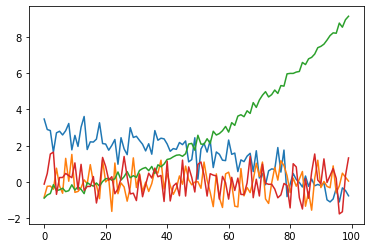

[[ 0.31070705 -0.01032891  1.99159715 -0.00587519]
 [ 3.10317259 -0.03896258 -1.48324507  0.08444365]
 [-0.2386836  -3.90479916  0.08291277  1.1971407 ]
 [ 0.02135891 -1.25916763  0.03130879 -4.54202774]]


In [8]:
plt.figure()
plt.plot(source)
plt.show()

print(unmixings[0])

rand_data4 = np.random.rand(100,4)
rand_data4[:,0] = np.square(t+0.1) + .25*np.random.rand(100)
transformed = ica.transform(rand_data4)



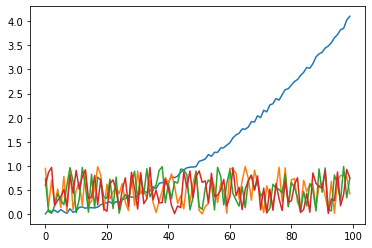

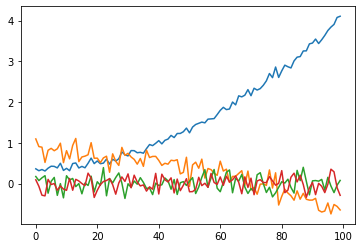

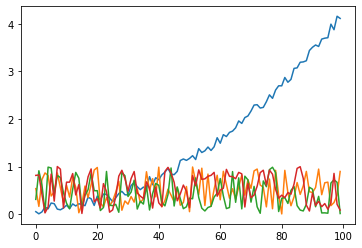

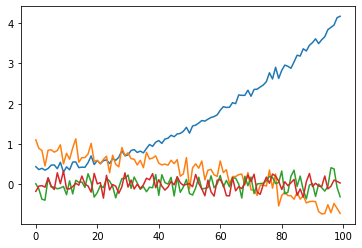

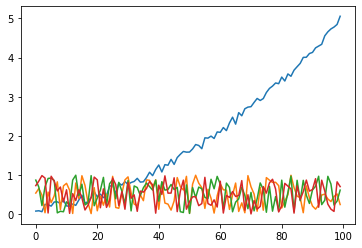

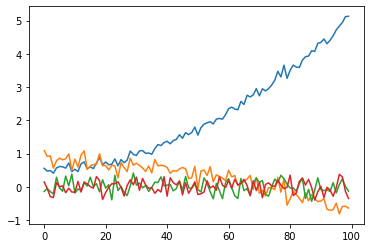

In [10]:
reverse = ica.inverse_transform()

plt.figure()
plt.plot(rand_data1)
plt.show()

plt.figure()
plt.plot(reverse[0])
plt.show()

plt.figure()
plt.plot(rand_data2)
plt.show()

plt.figure()
plt.plot(reverse[1])
plt.show()

plt.figure()
plt.plot(rand_data3)
plt.show()

plt.figure()
plt.plot(reverse[2])
plt.show()